<a href="https://colab.research.google.com/gist/gowatana/1fc66e48db015732e3a88870af2ac67b/demo-tensorflow-mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

参考：初心者のための TensorFlow 2.0 入門
https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ja


# 1. モデルの作成（コードの逐次実行）

TensorFlowのバージョン確認

In [ ]:
import tensorflow as tf
print(tf.__version__)

サンプル データセット（MNIST）の読み込み

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

モデルを定義する。

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

モデルをコンパイルする。

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

トレーニングを実行する。エポックの回数は5

In [ ]:
model.fit(x_train, y_train, epochs=5)

テストデータで、モデルを評価。

In [ ]:
model.evaluate(x_test,  y_test)

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

# 2. モデルの作成（ここまでのまとめ）
ここまでの手順をまとめて、ひとつのコードとして実行する。

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test)

# 3. 推論の実行

## 画像を生成して、推論してみる。



画像を生成

In [ ]:
import numpy as np
new_data = np.random.rand(28, 28)  # 28x28ピクセルの新しい画像を生成
new_data = new_data.reshape(1, 28, 28) / 255.0  # 形状を変更し、正規化

作成した画像で推論。

In [ ]:
predictions = model.predict(new_data)
predicted_class = np.argmax(predictions, axis=1)
print("Predicted class:", predicted_class)

生成された画像を表示する。（new_data 変数に格納されている）

In [ ]:
import matplotlib.pyplot as plt

# new_dataが (1, 28, 28) の形状をしている場合、最初の次元を削除
if new_data.shape[0] == 1:
    new_data = new_data.reshape(28, 28)

plt.imshow(new_data, cmap='gray')  # グレースケールで表示
plt.colorbar()  # カラーバーを表示
plt.show()

# 4. モデルの保存

SavedModel形式で保存する。

In [ ]:
model.save('mnist_saved_model')

ファイルが保存されたことを確認する。

In [ ]:
!ls -l

モデルのロードの例

In [ ]:
new_model = tf.saved_model.load('mnist_saved_model')

# 5. 推論実行（MNISTの画像）

トレーニングで利用したデータなので、まず正解するはず。

## MNISTのデータを画像ファイル（PNG）としての保存

In [ ]:
from PIL import Image
import tensorflow as tf
import os

dir_path = 'mnist_images'

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 保存先のディレクトリを作成
os.makedirs(dir_path, exist_ok=True)

# 画像の保存
for i in range(100):
    img = Image.fromarray(x_train[i])
    img.save(f'mnist_images/train_{i}.png')

In [ ]:
!ls mnist_images/ | head

train_0.png
train_10.png
train_11.png
train_12.png
train_13.png
train_14.png
train_15.png
train_16.png
train_17.png
train_18.png


画像の表示

ファイルを指定する。（例： train_1.png）

In [ ]:
img_file_name = 'mnist_images/train_1.png'

指定した画像を表示して確認。

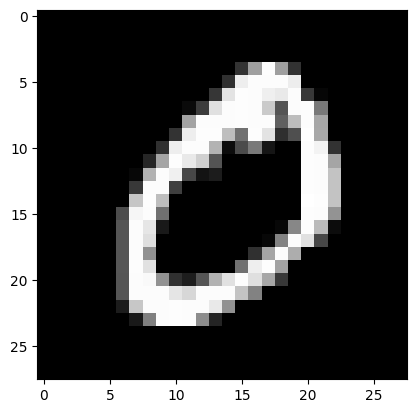

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open(img_file_name)
plt.imshow(img, cmap='gray')  # 画像がグレースケールの場合は cmap='gray' を使用
plt.show()

## 推論の実行

事前に、img_file_name = 'mnist_images/train_1.png' を指定してあるはず。

PIL（Python Image Library）のパッケージはPillow

In [ ]:
from PIL import Image
import numpy as np
import tensorflow as tf

# モデルを保存してあるパス
model_dir_path = 'mnist_saved_model'

# 画像の読み込み
img = Image.open(img_file_name)

# 画像をグレースケールに変換し、サイズを28x28にリサイズ
img = img.convert('L').resize((28, 28))

# NumPy配列に変換し、値を0から1の範囲に正規化
img_array = np.array(img) / 255.0

# モデルの入力形式に合わせるために配列の形状を変更（バッチサイズの次元を追加）
img_array = img_array.reshape(1, 28, 28)

# モデルのロード
model = tf.keras.models.load_model(model_dir_path)  # モデルのパスを適切に設定

# 推論
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
print("Predicted class:", predicted_class)

PIL（Pillow）のパッケージ確認。

In [ ]:
!pip list | grep -i pillow

Pillow                           9.4.0
